# 3.6 Lab: Linear Regression

## 3.6.1 Libraries

### In Python, module can be imported by a command similar to 'import numpy as np'. It is a good practice to maintain a section at the beginning of the notebook to import all necessary modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model

/Users/Beatrice1/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Since in Python, there is no default MASS module and Boston dataset, we will read in the Boston dataset from CSV.
The Boston data set records medv (median house value) for 506 neighborhoods around Boston. We will seek to predict
medv using 13 predictors such as rm (average number of rooms per house), age (average age of houses), and lstat (percent of households with low
socioeconomic status).

In [3]:
Boston = pd.read_csv('data/Boston.csv', header=0) # the first line of data is header

In [4]:
type(Boston)

pandas.core.frame.DataFrame

## 3.6.2 Simple Linear Regression

In [5]:
list(Boston)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [6]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
Boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [8]:
Boston.shape

(506, 14)

In [9]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


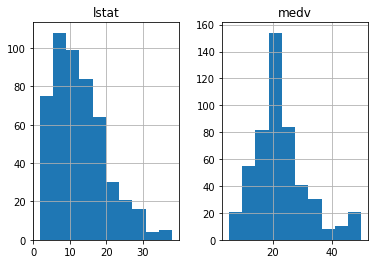

In [10]:
Boston.hist(column = ['lstat', 'medv'])
plt.show()

### To have similar formula notation as R, use the following import. One thing to note is that the ' ' for the formula part in fitting step and the '.fit()' at the end.

In [11]:
import statsmodels.formula.api as smf
# statsmodels is a Python module that provides classes and functions for the estimation of many different statistical 
# models, as well as for conducting statistical tests, and statistical data exploration. 
# http://www.statsmodels.org/stable/index.html

We will start by using the ols() function to fit a simple linear regression model, 
with medv as the response and lstat as the predictor. The basic
syntax is ols('y∼x',data), where y is the response, x is the predictor, and
data is the data set in which these two variables are kept.

In [12]:
lm = smf.ols ('medv~lstat', data = Boston).fit() 
# medv (median hourse value); lstat(percent of households with low socioeconomic status)

In [13]:
# lm.summary() gives us p-values and standard errors for the coefficients, as well as the R2 statistic 
# and F-statistic for the model.
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 08 Sep 2018   Prob (F-statistic):           5.08e-88
Time:                        15:04:27   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

### Use dir() to get a list of all the attributes an object has

In [14]:
dir(lm)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [16]:
print (lm.params)

Intercept    34.553841
lstat        -0.950049
dtype: float64


In [17]:
lm.params?

In [20]:
lm.conf_int?

lm.get_influence?

In [17]:
print (lm.conf_int())

                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


The predict() function can be used to produce the prediction of medv for a given value of lstat.

In [18]:
lm.predict(pd.DataFrame({'lstat':[5, 10, 15]}))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [19]:
print(Boston.lstat.min())
print(Boston.lstat.max())

1.73
37.97


In [21]:
X_new = pd.DataFrame({'lstat': [Boston.lstat.min(), Boston.lstat.max()]})
print (X_new)

   lstat
0   1.73
1  37.97


In [22]:
type(X_new)

pandas.core.frame.DataFrame

In [25]:
preds = lm.predict(X_new)

In [26]:
print(preds)

0    32.910255
1    -1.519533
dtype: float64


In [27]:
type(preds)

pandas.core.series.Series

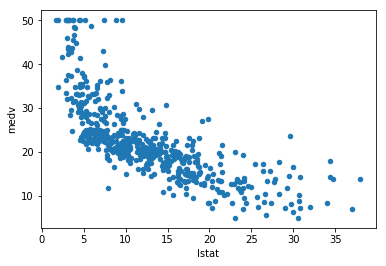

In [28]:
Boston.plot(kind='scatter', x='lstat', y='medv')
plt.show() 

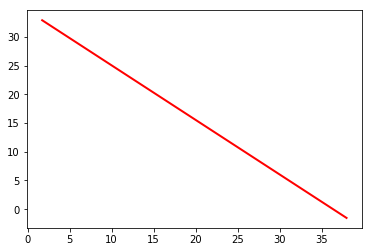

In [29]:
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show() 

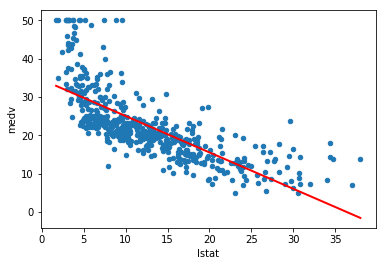

In [30]:
Boston.plot(kind='scatter', x='lstat', y='medv')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show() 

In [36]:
plt.plot?
# Pyplot tutorial: http://matplotlib.org/users/pyplot_tutorial.html

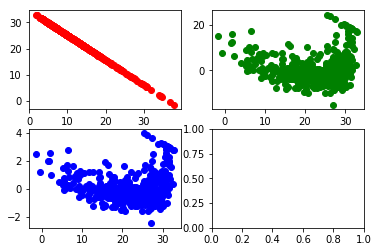

In [37]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(Boston.lstat, lm.predict(),'ro')
ax2.plot(lm.predict(), lm.resid, 'go')
ax3.plot(lm.predict(), lm.resid_pearson, 'bo')
plt.show() 
# On the basis of the residual plots, there is some evidence of non-linearity.
# A strong pattern in the residuals indicates non-linearity in the data.

### the statistics of the linear regression mostly stored in lm.get_influence(), for example, leverage.

In [38]:
dir(lm.get_influence())

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_drop_vari',
 '_ols_xnoti',
 '_res_looo',
 'aux_regression_endog',
 'aux_regression_exog',
 'cooks_distance',
 'cov_ratio',
 'det_cov_params_not_obsi',
 'dfbetas',
 'dffits',
 'dffits_internal',
 'endog',
 'ess_press',
 'exog',
 'get_resid_studentized_external',
 'hat_diag_factor',
 'hat_matrix_diag',
 'influence',
 'k_vars',
 'model_class',
 'nobs',
 'params_not_obsi',
 'resid_press',
 'resid_std',
 'resid_studentized_external',
 'resid_studentized_internal',
 'resid_var',
 'results',
 'sigma2_not_obsi',
 'sigma_est',
 'summary_frame',
 'summary_table']

### The following identifies the observation with the largest leverage 

Oversations with high leverage have unusual input values

In [39]:
np.argmax(lm.get_influence().hat_matrix_diag)

374

### For machine learning models, sklearn is the most common used module.

In [42]:
x = pd.DataFrame(Boston.lstat)
y = Boston.medv
print (x.shape)

model = linear_model.LinearRegression()
model.fit(x, y)
print (model.intercept_)
print (model.coef_)

(506, 1)
34.55384087938311
[-0.95004935]


In [22]:
linear_model.LinearRegression？

SyntaxError: invalid character in identifier (<ipython-input-22-b1fd7a71ef84>, line 1)

In [43]:
type(x)

pandas.core.frame.DataFrame

In [44]:
type(y)

pandas.core.series.Series

# 3.6.3 Multiple Linear Regression

### To do multiple linear regression, we can use those two modules again. 

In order to fit a multiple linear regression model using least squares, we
again use the ols() function. The syntax ols(y∼x1+x2+x3) is used to fit a
model with three predictors, x1, x2, and x3.

In [45]:
lm = smf.ols ('medv~lstat+age', data = Boston).fit()

In [46]:
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sat, 25 Aug 2018   Prob (F-statistic):           2.98e-88
Time:                        14:22:19   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

### If we want to use all the variable. We can use the following trick to manually construct the list. In Python, most of time, you have to manully construct the variable list.

In [64]:
all_columns = "+".join(Boston.columns.difference(["medv"]))
print(all_columns)

age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn


In [65]:
my_formula = "medv~" + all_columns
print(my_formula)

medv~age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn


In [66]:
lm = smf.ols(my_formula, data=Boston).fit()

In [67]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 25 Aug 2018   Prob (F-statistic):          6.72e-135
Time:                        14:48:02   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

### What if we would like to perform a regression using all of the variables but one? For example, in the above regression output, age has a high p-value. So we may wish to run a regression excluding this predictor.

In [ ]:
# Excercise Q1:
# build a model using all of the variables but age.

### Unlike R, Python is not fully up speeded to all the statistics. If you want to have the VIF of the variables in LM, you have to code a little bit.
Most VIF(variance inflation factors) values are low to moderate for this data.
Collinearity refers to the situation in which two or more predictor variables are closely related to one another. a VIF value that exceeds 5 or 10 indicates a problematic amount of Collinearity.

In [74]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
y, X = dmatrices(my_formula, data=Boston, return_type='dataframe')
vif_coeff = {}
for i in range(X.shape[1]):
    vif_coeff[X.columns[i]] = variance_inflation_factor(np.array(X.dropna()),i)
print (vif_coeff)

{'Intercept': 585.2652379423121, 'age': 3.1008255128153364, 'black': 1.3485210764063753, 'chas': 1.0739953275537886, 'crim': 1.7921915474332406, 'dis': 3.9559449063727263, 'indus': 3.9915964183460315, 'lstat': 2.9414910780919366, 'nox': 4.393719847577495, 'ptratio': 1.7990840492488989, 'rad': 7.484496335274472, 'rm': 1.9337444357832574, 'tax': 9.00855394759707, 'zn': 2.298758178749441}


In [76]:
X.shape [1]

14

## 3.6.7 Writing Functions

### Let us write a simple function to print current time. The key word in Python for user defined function is 'def'. Pay attention to the ':'. The difference betwwen R (others) and Python is that Python forces you to obey its indentation rules. For example, the following function won't work because of the extra space in front of 'print'.

In [1]:
def print_current_time_wrong():
    from datetime import datetime
     print (str(datetime.now()))

IndentationError: unexpected indent (<ipython-input-1-efce751e758c>, line 3)

In [54]:
def print_current_time():
    from datetime import datetime
    print (str(datetime.now())) 

In [55]:
print_current_time()

2018-08-25 14:30:34.556267
